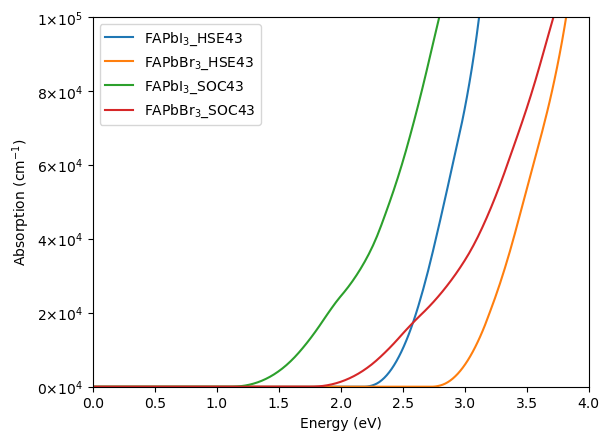

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import ScalarFormatter

materials = {
    "FAPbI$_3$_HSE43": {
        "dir" : 2.189, 
        "indir" :2.189, 
        "folder": "./primitive/I/HSE43/"
    },
    "FAPbBr$_3$_HSE43":{
        "dir": 2.73,
        "indir": 2.73,
        "folder": "./primitive/Br/HSE43/"
    },
    "FAPbI$_3$_SOC43":{
        "dir": 1.195,
        "indir": 1.195,
        "folder": "./primitive/I/SOC43/"
    },
    "FAPbBr$_3$_SOC43":{
        "dir": 1.806,
        "indir": 1.806,
        "folder": "./primitive/Br/SOC43/"
    },
}

fig, ax = plt.subplots()

for material, material_data in materials.items():
    data = np.loadtxt(material_data["folder"] + 'absorption.dat', delimiter=' ')
    energy = data[:,0]
    alpha_cm = data[:,1]
    ax.plot(energy, alpha_cm, label=material)

ax.set(xlim=[0,4],ylim = [0,1e5], xlabel='Energy (eV)', ylabel='Absorption (cm$^{-1}$)')
plt.legend()

# Custom formatter function to display labels as multiples of 10^4
def custom_formatter(x, pos):
    if x == 100000:
        return '1×10$^{5}$'  # Specific format for 100,000
    return f'{int(x/10000)}×10$^{4}$'

ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))